In [1]:
import numpy as np
import argus_shapes
import os
import skimage.io as skio
import skimage.transform as skit

%matplotlib inline
import matplotlib.pyplot as plt

2017-11-12 12:33:54,573 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
rootfolder = 'C:/Users/mbeyeler/data/secondsight/shape/52-001'
df = argus_shapes.load_data(rootfolder)

In [3]:
df[:5]

,Filename,Params,Folder
0,20100121_112209_trial8.bmp,52-001_SingleElectrode_f20_pw46_20100105.csv A...,C:/Users/mbeyeler/data/secondsight/shape/52-00...
1,20100121_112209_trial13.bmp,52-001_SingleElectrode_f20_pw46_20100105.csv A...,C:/Users/mbeyeler/data/secondsight/shape/52-00...
2,20100121_112209_trial29.bmp,52-001_SingleElectrode_f20_pw46_20100105.csv A...,C:/Users/mbeyeler/data/secondsight/shape/52-00...
3,20100121_112209_trial32.bmp,52-001_SingleElectrode_f20_pw46_20100105.csv A...,C:/Users/mbeyeler/data/secondsight/shape/52-00...
4,20100121_112209_trial49.bmp,52-001_SingleElectrode_f20_pw46_20100105.csv A...,C:/Users/mbeyeler/data/secondsight/shape/52-00...


In [4]:
preprocess = argus_shapes.DataPreprocessor(electrodes='A05')

In [5]:
X, y = preprocess.fit_transform(df)

c:\users\mbeyeler\miniconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Could not parse row: 20100121_112209_trial15 blank
Could not parse row: 20100121_112209_trial43 blank
Found multiple props: C:/Users/mbeyeler/data/secondsight/shape/52-001\20100128\2xTh_20Hz_0.45ms_250ms 20100128_113533_trial12.bmp
Chose props[0] with area 309.000000
Could not parse row: 20100429_100826_trial3 blank
Could not parse row: 20100429_100826_trial20 blank
Could not parse row: 20100429_100826_trial32 blank
Could not parse row: 20100429_100826_trial33 blank


In [6]:
np.unique([x['date'] for x in X])

array(['20100121', '20100128', '20100204'],
      dtype='<U8')

In [7]:
len(X), len(y)

(15, 15)

In [8]:
areas = [x['area'] for x in X]
np.mean(areas), np.std(areas)

(31.274999999999999, 15.398471244466661)

In [9]:
majors = [x['major_axis_length'] for x in X]
np.mean(majors), np.std(majors)

(8.6449233465761139, 1.7255675721090227)

In [10]:
minors = [x['minor_axis_length'] for x in X]
np.mean(minors), np.std(minors)

(5.2722868476053852, 1.8847726665607205)

In [11]:
orient = np.rad2deg([x['orientation'] for x in X])
np.mean(orient), np.std(orient)

(45.479213326139828, 44.943626401905718)

In [12]:
img = skio.imread(os.path.join(X[0]['folder'], X[0]['filename']))

In [13]:
img.shape

(768, 1024)

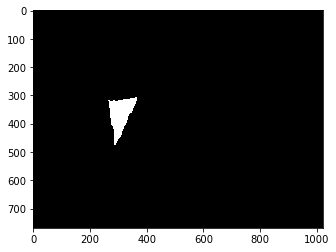

In [14]:
plt.imshow(img, cmap='gray')